# Analyze Your Untappd Check-in Data

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, json, math, random
from mpl_toolkits.basemap import Basemap
from dateutil import parser as date_parser
%matplotlib inline

In [2]:
df = pd.read_csv('data/untappd_details_geocoded_timezone.csv', encoding='utf-8')
df['date_pacific_tz'] = df['date_pacific_tz'].map(lambda x: date_parser.parse(x))
df['date_local_tz'] = df['date_local_tz'].map(lambda x: date_parser.parse(x))
df.head()

,date_pacific_tz,beer_name,beer_style,brewery_name,brewery_place,brewery_type,rating,beer_avg_rating,brewery_avg_rating,beer_abv,...,venue_lon,venue_total_checkins,checkin_id,beer_url,brewery_url,venue_url,brewery_lat,brewery_lon,venue_timezone,date_local_tz
0,2016-06-13 20:07:07-07:00,Apocalypse IPA,IPA - American,10 Barrel Brewing Co.,"Bend, OR United States",Micro Brewery,4.00,3.78,3.67,6.8,...,-122.271,132.0,323491711,https://untappd.com/b/10-barrel-brewing-co-apo...,https://untappd.com/w/10-barrel-brewing-co/3436,https://untappd.com/v/boeing-manor/509841,44.058173,-121.315310,America/Los_Angeles,2016-06-13 20:07:07-07:00
1,2016-06-11 23:14:09-07:00,Liberty Ale,IPA - American,Anchor Brewing Company,"San Francisco, CA United States",Micro Brewery,4.00,3.49,3.50,5.9,...,-122.282,18.0,322871654,https://untappd.com/b/anchor-brewing-company-l...,https://untappd.com/w/anchor-brewing-company/3891,https://untappd.com/v/chateau-szibbo/2699353,37.774929,-122.419415,America/Los_Angeles,2016-06-11 23:14:09-07:00
2,2016-06-11 22:46:58-07:00,Anchor IPA,IPA - American,Anchor Brewing Company,"San Francisco, CA United States",Micro Brewery,3.75,3.48,3.50,6.5,...,-122.282,18.0,322868109,https://untappd.com/b/anchor-brewing-company-a...,https://untappd.com/w/anchor-brewing-company/3891,https://untappd.com/v/chateau-szibbo/2699353,37.774929,-122.419415,America/Los_Angeles,2016-06-11 22:46:58-07:00
3,2016-06-11 21:06:04-07:00,Apocalypse IPA,IPA - American,10 Barrel Brewing Co.,"Bend, OR United States",Micro Brewery,4.00,3.78,3.67,6.8,...,-122.282,18.0,322842097,https://untappd.com/b/10-barrel-brewing-co-apo...,https://untappd.com/w/10-barrel-brewing-co/3436,https://untappd.com/v/chateau-szibbo/2699353,44.058173,-121.315310,America/Los_Angeles,2016-06-11 21:06:04-07:00
4,2016-06-11 21:03:12-07:00,Angel City IPA,IPA - American,Angel City Brewery,"Los Angeles, CA United States",Micro Brewery,3.50,3.56,3.47,6.1,...,-122.282,18.0,322841026,https://untappd.com/b/angel-city-brewery-angel...,https://untappd.com/w/angel-city-brewery/4406,https://untappd.com/v/chateau-szibbo/2699353,34.052234,-118.243685,America/Los_Angeles,2016-06-11 21:03:12-07:00


In [3]:
len(df)

1436

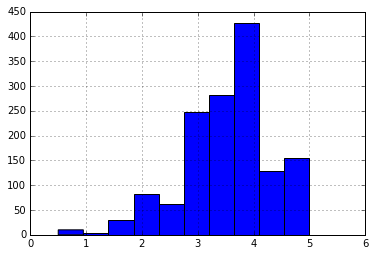

In [4]:
ax = df['rating'].hist()

In [5]:
df['beer_brewery'] = df['beer_name'] + ' | ' + df['brewery_name']

In [6]:
unique_beers = df.drop_duplicates(['beer_name', 'brewery_name'])

In [7]:
# the beers i hated the most
df.sort_values('rating', ascending=True)[['beer_name', 'brewery_name', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,rating
285,Coors Light,Coors Brewing Company,0.5
458,Virgin Craft Brewed Lager,MADD Virgin Drinks,0.5
641,Bud Light,Anheuser-Busch,0.5
951,Bud Light Lime Cran-Brrr-Rita,Anheuser-Busch,0.5
479,Bitburger Drive,Bitburger Braugruppe,0.5
932,Brahma Malzbier,Ambev,0.5
1231,Natural Light,Anheuser-Busch,0.5
1372,Miller Lite,Miller Brewing Company,1.0
1336,Goldbräu / Stiegl Beer,Stieglbrauerei zu Salzburg,1.0
950,Tecate,Cervecería Cuauhtémoc Moctezuma S.A. de C.V.,1.0


In [8]:
# the beers i loved the most
df.sort_values('rating', ascending=False)[['beer_name', 'brewery_name', 'rating']].drop_duplicates().head(25)

,beer_name,brewery_name,rating
491,Pliny the Elder,Russian River Brewing Company,5.00
1410,30th Street Pale Ale,Green Flash Brewing Company,5.00
1136,Pabst Blue Ribbon,Pabst Brewing Company,5.00
1137,Pale Ale,Sierra Nevada Brewing Co.,5.00
1142,Proving Ground IPA,Magnolia Brewing Company,5.00
381,Summer Solstice,Anderson Valley Brewing Company,5.00
373,Wipeout IPA,Port Brewing Company,5.00
637,Fresh Squeezed IPA,Deschutes Brewery,5.00
357,Blind Pig IPA,Russian River Brewing Company,5.00
1416,Sculpin IPA,Ballast Point Brewing & Spirits,5.00


In [9]:
# the beers i've had that the public has loved the most
df.sort_values('beer_avg_rating', ascending=False)[['beer_name', 'brewery_name', 'beer_avg_rating', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_avg_rating,rating
492,Pliny the Younger (2015),Russian River Brewing Company,4.71,5.00
493,Pliny the Younger,Russian River Brewing Company,4.70,5.00
491,Pliny the Elder,Russian River Brewing Company,4.57,5.00
891,Vintage (Barrel No 144) (2010),Brouwerij Rodenbach,4.37,4.00
57,Sucaba,Firestone Walker Brewing Company,4.37,3.75
1260,Stone Enjoy By 04.01.13 IPA,Stone Brewing,4.35,4.50
490,Blind Pig IPA,Russian River Brewing Company,4.20,5.00
317,Hop Venom,Boneyard Beer Company,4.20,3.75
646,Xocoveza Mocha Stout,Stone Brewing,4.16,2.00
202,Born Yesterday Pale Ale (2015),Lagunitas Brewing Company,4.14,4.25


In [10]:
# the beers i've had that the public has hated the most
df.sort_values('beer_avg_rating', ascending=True)[['beer_name', 'brewery_name', 'beer_avg_rating', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_avg_rating,rating
458,Virgin Craft Brewed Lager,MADD Virgin Drinks,1.14,0.50
474,St. Pauli Girl NA,Brauerei Beck,1.96,2.00
1231,Natural Light,Anheuser-Busch,1.97,0.50
697,Big Flats 1901,"Winery Exchange, World Brews",2.08,1.50
932,Brahma Malzbier,Ambev,2.13,0.50
437,Dali V8,Dali Beer Group,2.14,2.25
931,Skol,Ambev,2.18,2.00
436,Snow,China Resources Snow Breweries,2.19,2.50
479,Bitburger Drive,Bitburger Braugruppe,2.19,0.50
641,Bud Light,Anheuser-Busch,2.22,0.50


In [11]:
# beers i've had that the public has checked-in the most
df.sort_values('beer_total_checkins', ascending=False)[['beer_name', 'brewery_name', 'beer_total_checkins', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_total_checkins,rating
969,Guinness Draught,Guinness,1180000.0,4.0
641,Bud Light,Anheuser-Busch,1090000.0,0.5
1372,Miller Lite,Miller Brewing Company,1000000.0,1.0
603,Traditional Lager,Yuengling Brewery,946260.0,3.5
627,Coors Light,Coors Brewing Company,878303.0,0.5
147,IPA,Lagunitas Brewing Company,784902.0,4.0
949,Two Hearted Ale,Bell's Brewery,768571.0,3.0
282,Heineken,Heineken,707010.0,3.0
352,Pabst Blue Ribbon,Pabst Brewing Company,705864.0,5.0
1034,Belgian White,Blue Moon Brewing Company,677919.0,3.0


In [12]:
# places i've checked into that the public has checked into the most
df.sort_values('venue_total_checkins', ascending=False)[['venue_name', 'venue_place', 'venue_total_checkins']].drop_duplicates('venue_name').head(10)

,venue_name,venue_place,venue_total_checkins
491,Russian River Brewing Company,"725 4th St Santa Rosa, CA",173934.0
645,Stone Brewing World Bistro & Gardens,"1999 Citracado Pkwy Escondido, CA",96017.0
853,Lagunitas Brewing Company,"1280 N McDowell Blvd Petaluma, CA",57791.0
1413,Toronado,"4026 30th St San Diego, CA",53225.0
553,Arizona Wilderness Brewing Co.,"721 N Arizona Ave Gilbert, AZ",47610.0
1009,Beer Revolution,"464 3rd St Oakland, CA",46417.0
977,City Beer Store,"1168 Folsom St San Francisco, CA",42634.0
314,The Rare Barrel,"940 Parker Street Berkeley, CA",36478.0
1358,Pizza Port Brewing Company,"1956 Bacon St San Diego, CA",33427.0
1081,APEX,"1216 SE Division St Portland, OR",30968.0


In [13]:
# what styles have i had the most?
df['beer_style'].value_counts().head(10)

IPA - American                       270
Pale Ale - American                  142
Lager - North American Adjunct       124
Lager - Pale                          79
Pilsner - German                      62
Pilsner - Other                       59
Pilsner - Czech                       42
Red Ale - American Amber / Red        36
Kölsch                                33
IPA - Session / India Session Ale     32
Name: beer_style, dtype: int64

In [14]:
# what basic styles have i had the most?
df['beer_style'].map(lambda x: str(x).split(' - ')[0]).value_counts().head(10)

IPA                              365
Lager                            314
Pale Ale                         172
Pilsner                          163
Red Ale                           45
Kölsch                            33
California Common                 22
Golden Ale                        20
Stout                             18
Extra Special / Strong Bitter     18
Name: beer_style, dtype: int64

In [15]:
# what beers have i checked-in the most?
df['beer_brewery'].value_counts().head(10)

Pabst Blue Ribbon | Pabst Brewing Company             44
Pale Ale | Sierra Nevada Brewing Co.                  21
Trumer Pils | Trumer                                  17
Hop Knot | Four Peaks Brewing Company                 17
Anchor Steam Beer | Anchor Brewing Company            16
IPA | Lagunitas Brewing Company                       15
Hamm's Premium | Miller Brewing Company               11
Hofbräu Original | Staatliches Hofbräuhaus München    10
Kilt Lifter | Four Peaks Brewing Company              10
Kölsch | Jupiter                                      10
Name: beer_brewery, dtype: int64

In [16]:
# what breweries have i checked into the most?
df['brewery_name'].value_counts().head(10)

Sierra Nevada Brewing Co.          71
Four Peaks Brewing Company         56
Pabst Brewing Company              55
Lagunitas Brewing Company          37
Deschutes Brewery                  34
Jupiter                            31
Ninkasi Brewing Company            22
Anchor Brewing Company             21
SanTan Brewing Company             19
Anderson Valley Brewing Company    18
Name: brewery_name, dtype: int64

In [17]:
# what breweries have i had the greatest number of unique beers from?
unique_beers['brewery_name'].value_counts().head(10)

Sierra Nevada Brewing Co.           38
Lagunitas Brewing Company           18
Deschutes Brewery                   16
Four Peaks Brewing Company          15
Stone Brewing                       13
Ninkasi Brewing Company             13
SanTan Brewing Company              12
New Belgium Brewing Company         11
Firestone Walker Brewing Company     8
Full Sail Brewing Company            8
Name: brewery_name, dtype: int64

In [18]:
# what unique beers have i had from four peaks?
unique_beers[unique_beers['brewery_name']=='Four Peaks Brewing Company'][['date_local_tz', 'beer_name', 'rating']]

,date_local_tz,beer_name,rating
47,2016-05-02 20:17:30-07:00,Gumleaf Schooner,4.50
48,2016-05-02 19:23:14-07:00,Short Hop,4.50
51,2016-05-01 19:05:37-07:00,Hop Knot,5.00
53,2016-05-01 16:39:45-07:00,8th Street Pale Ale,4.00
190,2015-12-26 23:03:33-07:00,Raj IPA,4.00
193,2015-12-26 19:24:05-07:00,White Ale,2.75
205,2015-12-22 23:01:59-07:00,Double Knot,4.00
271,2015-10-03 14:51:03-07:00,Lefty's Lager,3.75
272,2015-10-03 14:49:41-07:00,Western Rivers English Summer Ale,3.75
273,2015-10-03 14:01:10-07:00,Single Tank Series: Hoppy Pils,4.50


## Look at hour and day of the week

In [19]:
df['date_local_tz'].map(lambda x: x.hour).value_counts()

20    194
19    177
21    155
18    152
22    121
17    106
14     97
16     93
15     77
23     73
13     68
12     53
0      25
11     12
1      12
9       7
8       4
10      3
7       3
3       2
2       2
Name: date_local_tz, dtype: int64

In [20]:
df['date_local_tz'].map(lambda x: x.weekday()).value_counts()

5    355
4    272
6    197
3    188
2    153
0    150
1    121
Name: date_local_tz, dtype: int64

## Map the breweries I have tried

In [21]:
df_breweries = df[[col for col in df.columns if 'brewery_' in col]]
df_breweries = df_breweries.drop_duplicates(['brewery_name', 'brewery_place'])
df_breweries = df_breweries.dropna(subset=['brewery_lat', 'brewery_lon'], how='any')
print(len(df_breweries))
df_breweries.head()

434


,brewery_name,brewery_place,brewery_type,brewery_avg_rating,brewery_total_checkins,brewery_url,brewery_lat,brewery_lon
0,10 Barrel Brewing Co.,"Bend, OR United States",Micro Brewery,3.67,264986.0,https://untappd.com/w/10-barrel-brewing-co/3436,44.058173,-121.315310
1,Anchor Brewing Company,"San Francisco, CA United States",Micro Brewery,3.50,966631.0,https://untappd.com/w/anchor-brewing-company/3891,37.774929,-122.419415
4,Angel City Brewery,"Los Angeles, CA United States",Micro Brewery,3.47,70364.0,https://untappd.com/w/angel-city-brewery/4406,34.052234,-118.243685
7,Cascade Brewery Co. (Australia),"South Hobart, Tas. Australia",Macro Brewery,2.93,12291.0,https://untappd.com/w/cascade-brewery-co-austr...,-42.892500,147.316111
8,Naked For Satan,Australia,Nano Brewery,3.25,95.0,https://untappd.com/w/naked-for-satan/83569,-25.274398,133.775136


In [22]:
def random_in_range(lower_range, upper_range):
    return random.random() * (upper_range - lower_range) + lower_range

# jitter either a lat or a long within n kms of original
def jitter(val, kms=1):
    rad_Earth = 6378.16
    one_degree = (2 * math.pi * rad_Earth) / 360
    one_km = 1 / one_degree
    return random_in_range(val - (kms * one_km), val + (kms * one_km))

# jitter a lat-long coordinate pair within n kms of the original location
def jitter_lat_lon(lat, lon, kms=1):
    new_lat = jitter(lat)
    new_lon = jitter(lon)
    return new_lat, new_lon

# demonstrate
print(jitter_lat_lon(34.052234, -118.243685))
print(jitter(34.052234))

(34.053754472098056, -118.24365040476634)
34.05642655241827


In [23]:
df_breweries['brewery_lat'] = df_breweries['brewery_lat'].map(jitter)
df_breweries['brewery_lon'] = df_breweries['brewery_lon'].map(jitter)

In [24]:
# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#eaeaea'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

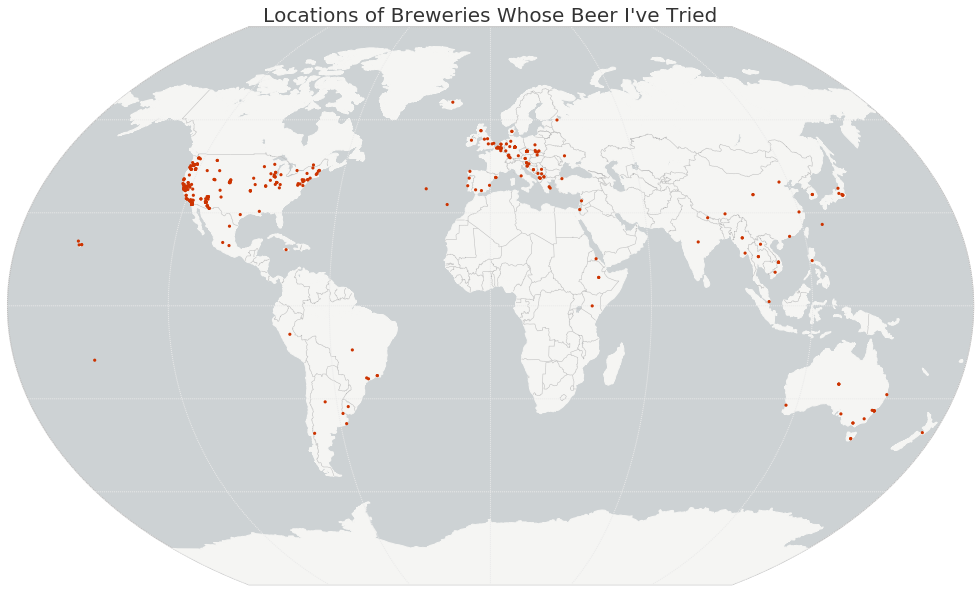

In [25]:
# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, axisbg='#ffffff', frame_on=False)
ax.set_title('Locations of Breweries Whose Beer I\'ve Tried', fontsize=20, color='#333333')

# draw the basemap and its features
m = Basemap(projection='kav7', lon_0=0, resolution='l', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# project our points and scatter plot them
x, y = m(df_breweries['brewery_lon'].values, df_breweries['brewery_lat'].values)
m.scatter(x, y, s=10, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# show the map
plt.savefig('images/brewery_location_world_map.png', dpi=180, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Leaflet

In [26]:
# determine how many times each place appears in dataset, and break latlng into discrete lat and long
place_counts = df_breweries['brewery_place'].value_counts()
df_breweries['place_count'] = df_breweries['brewery_place'].map(lambda x: place_counts[x])

In [27]:
# create html list of artists from each place
features = []
for brewery_place in df_breweries['brewery_place'].unique():
    
    # how many breweries to show before saying "...and n more"
    num_to_show = 3
    line_break = '<br />'
    breweries = ''
    
    place_count = place_counts[brewery_place]
    names = df_breweries[df_breweries['brewery_place']==brewery_place]['brewery_name']
    
    if place_count <= num_to_show:
        for name in names:
            breweries = '{}{}{}'.format(breweries, name, line_break)
            
    else:
        for name in names[0:num_to_show]:
            breweries = '{}{}{}'.format(breweries, name, line_break)
        breweries = '{}...and {} more'.format(breweries, place_count - num_to_show)
        
    features.append([brewery_place, breweries])

df_leaflet = pd.DataFrame(features, columns=['brewery_place', 'breweries'])
df_leaflet.head()

,brewery_place,breweries
0,"Bend, OR United States",10 Barrel Brewing Co.<br />Deschutes Brewery<b...
1,"San Francisco, CA United States",Anchor Brewing Company<br />Fort Point Beer Co...
2,"Los Angeles, CA United States",Angel City Brewery<br />Eagle Rock Brewery<br ...
3,"South Hobart, Tas. Australia",Cascade Brewery Co. (Australia)<br />
4,Australia,Naked For Satan<br />Venom Brewing<br />McLare...


In [28]:
# add lat and long back to the dataframe
place_lat_lon = {}
df_unique = df_breweries[['brewery_place', 'brewery_lat', 'brewery_lon']].drop_duplicates(subset='brewery_place')
for label in df_unique.index:
    place_lat_lon[df_unique.loc[label, 'brewery_place']] = (df_unique.loc[label, 'brewery_lat'], df_unique.loc[label, 'brewery_lon'])
    
df_leaflet['brewery_lat'] = df_leaflet['brewery_place'].map(lambda x: place_lat_lon[x][0])
df_leaflet['brewery_lon'] = df_leaflet['brewery_place'].map(lambda x: place_lat_lon[x][1])
df_leaflet.head()

,brewery_place,breweries,brewery_lat,brewery_lon
0,"Bend, OR United States",10 Barrel Brewing Co.<br />Deschutes Brewery<b...,44.056832,-121.314627
1,"San Francisco, CA United States",Anchor Brewing Company<br />Fort Point Beer Co...,37.781822,-122.425900
2,"Los Angeles, CA United States",Angel City Brewery<br />Eagle Rock Brewery<br ...,34.043514,-118.245575
3,"South Hobart, Tas. Australia",Cascade Brewery Co. (Australia)<br />,-42.893864,147.308891
4,Australia,Naked For Satan<br />Venom Brewing<br />McLare...,-25.270983,133.784042


In [29]:
# function to write the dataframe out to geojson
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [30]:
geojson = df_to_geojson(df_leaflet, df_leaflet.columns, lat='brewery_lat', lon='brewery_lon')

# save the geojson result to a file
output_filename = 'leaflet/untappd-brewery-dataset.js'
with open(output_filename, 'w') as output_file:
    output_file.write('var dataset = {};'.format(json.dumps(geojson)))
    
# how many features did we save to the geojson file?
print('{:,} geotagged features saved to file'.format(len(geojson['features'])))

268 geotagged features saved to file
